In [ ]:
"""
You can run either this notebook locally (if you have all the dependencies and a GPU) or on Google Colab.

Instructions for setting up Colab are as follows:
1. Open a new Python 3 notebook.
2. Import this notebook from GitHub (File -> Upload Notebook -> "GITHUB" tab -> copy/paste GitHub URL)
3. Connect to an instance with a GPU (Runtime -> Change runtime type -> select "GPU" for hardware accelerator)
4. Run this cell to set up dependencies.
5. Restart the runtime (Runtime -> Restart Runtime) for any upgraded packages to take effect
"""
# If you're using Google Colab and not running locally, run this cell.

## Install dependencies
!pip install wget
!apt-get install sox libsndfile1 ffmpeg
!pip install unidecode


## Install NeMo
BRANCH = 'r1.4.0'
!python -m pip install git+https://github.com/NVIDIA/NeMo.git@$BRANCH#egg=nemo_toolkit[all]

## Grab the config we'll use in this example
!mkdir configs
!wget -P configs/ https://raw.githubusercontent.com/NVIDIA/NeMo/$BRANCH/examples/asr/conf/config.yaml
!pip install matplotlib==3.1.3
"""
Remember to restart the runtime for the kernel to pick up any upgraded packages (e.g. matplotlib)!
Alternatively, you can uncomment the exit() below to crash and restart the kernel, in the case
that you want to use the "Run All Cells" (or similar) option.
"""

!find / -name "*cuda*.so"
!export LD_LIBRARY_PATH="usr/local/cuda-10.0/lib64:$LD_LIBRARY_PATH"
!export LD_LIBRARY_PATH="usr/local/cuda-10.1/lib64:$LD_LIBRARY_PATH"
!export LD_LIBRARY_PATH="usr/local/cuda-11.1/lib64:$LD_LIBRARY_PATH"
!pip install mmcv-full==1.1.4 -i https://pypi.tuna.tsinghua.edu.cn/simple
!pip install git+https://github.com/deepset-ai/haystack.git
!pip install farm-haystack
!pip install torchaudio==0.9.0


# exit()

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=7030ef6b8bca4eec568fadc939a674ffbec56ac7089defcf0ce462ec0165ff5d
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsndfile1 is already the newest version (1.0.28-4ubuntu0.18.04.2).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following additional packages will be installed:
  libmagic-mgc libmagic1 libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa
  libsox-fmt-base libsox3
Suggested packages:
  file libsox-fmt-all
The following NEW packages will be installed:
  libmagic-mgc libmagic1 libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa
  libsox-fmt-base libsox3 sox
0 upgraded, 8 newly installed, 0 to remove and 37 not upgraded.
Need to get 760 kB of archives.
After this operation, 6,717 kB of additional disk s

'\nRemember to restart the runtime for the kernel to pick up any upgraded packages (e.g. matplotlib)!\nAlternatively, you can uncomment the exit() below to crash and restart the kernel, in the case\nthat you want to use the "Run All Cells" (or similar) option.\n'

In [ ]:
# Папка, где будет размещаться датасет Golos
data_dir = '/content'

In [ ]:
import glob
import os
import subprocess
import tarfile
import wget

# Загрузка датасета Golos
def load(golos_url, fname):
  if not os.path.exists(os.path.join(data_dir, fname)):
      golos_path = wget.download(golos_url, os.path.join(data_dir, fname))
      print(f"Dataset downloaded at: {golos_path}")
  else:
      print("Tarfile already exists.")
      golos_path = os.path.join(data_dir, fname)
  return golos_path

golos_path = load("https://sc.link/Kqr", "test.tar")

if not os.path.exists(os.path.join(data_dir, '/test/')):
    tar = tarfile.open(golos_path)
    tar.extractall(path=data_dir)

Dataset downloaded at: /content/test.tar


In [ ]:
import librosa
import IPython.display as ipd

# Load and listen to the audio file
example_file = data_dir + '/test/crowd/files/e632f7d39c15e7edfc665b91e6f2071f.wav'

audio, sample_rate = librosa.load(example_file)

ipd.Audio(example_file, rate=sample_rate)

In [ ]:
!pip install torchtext==0.10.1
!pip install matplotlib==3.1.3

     |████████████████████████████████| 7.6 MB 575 kB/s 
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.11.0
    Uninstalling torchtext-0.11.0:
      Successfully uninstalled torchtext-0.11.0


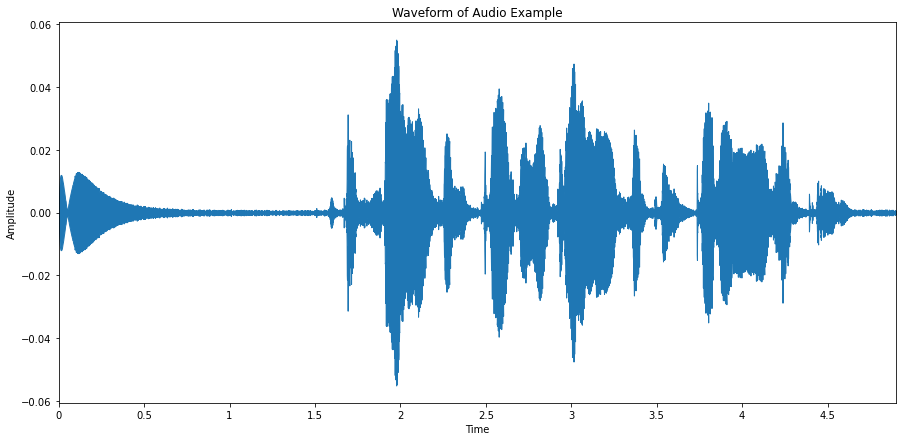

In [ ]:
%matplotlib inline
import librosa.display
import matplotlib.pyplot as plt

# Plot our example audio file's waveform
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Waveform of Audio Example')
plt.ylabel('Amplitude')

_ = librosa.display.waveplot(audio)

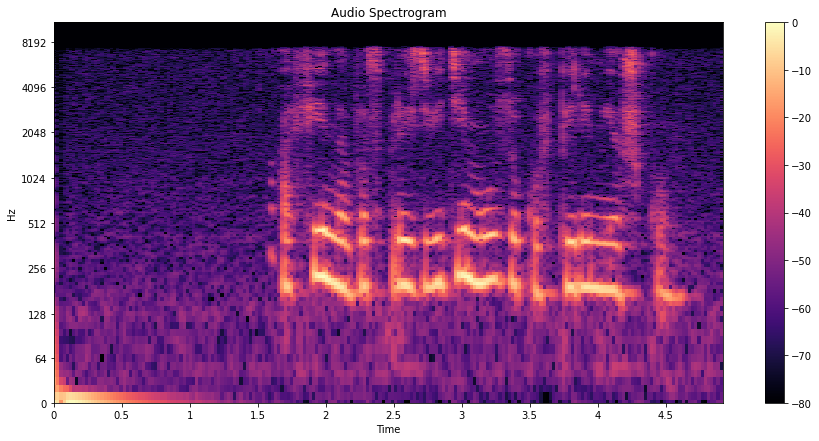

In [ ]:
import numpy as np

# Get spectrogram using Librosa's Short-Time Fourier Transform (stft)
spec = np.abs(librosa.stft(audio))
spec_db = librosa.amplitude_to_db(spec, ref=np.max)  # Decibels

# Use log scale to view frequencies
librosa.display.specshow(spec_db, y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Audio Spectrogram');

In [ ]:
# NeMo's "core" package
import nemo
# NeMo's ASR collection - this collections contains complete ASR models and
# building blocks (modules) for ASR
import nemo.collections.asr as nemo_asr

In [ ]:
load("https://sc.link/ZMv", "QuartzNet15x5_golos.nemo")

asr_model = nemo_asr.models.EncDecCTCModel.restore_from(os.path.join(data_dir, "QuartzNet15x5_golos.nemo"))

Dataset downloaded at: /content/QuartzNet15x5_golos.nemo


[NeMo W 2021-11-30 19:55:20 modelPT:131] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: train/golos_and_mcv.jsonl
    sample_rate: 16000
    labels:
    - ' '
    - а
    - б
    - в
    - г
    - д
    - е
    - ж
    - з
    - и
    - й
    - к
    - л
    - м
    - н
    - о
    - п
    - р
    - с
    - т
    - у
    - ф
    - х
    - ц
    - ч
    - ш
    - щ
    - ъ
    - ы
    - ь
    - э
    - ю
    - я
    batch_size: 64
    trim_silence: false
    max_duration: 20.0
    min_duration: 0.1
    num_workers: 20
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    parser: ru
    
[NeMo W 2021-11-30 19:55:20 modelPT:138] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a

[NeMo I 2021-11-30 19:55:20 features:262] PADDING: 16
[NeMo I 2021-11-30 19:55:20 features:279] STFT using torch
[NeMo I 2021-11-30 19:55:23 save_restore_connector:143] Model EncDecCTCModel was successfully restored from /content/QuartzNet15x5_golos.nemo.


In [ ]:
files = [data_dir + "/test/crowd/files/e632f7d39c15e7edfc665b91e6f2071f.wav",
         data_dir + "/test/crowd/files/5db5df8bb9e3b6660b2a04b34d4a355d.wav"]
transcriptions = asr_model.transcribe(paths2audio_files=files)
for fname, transcription in zip(files, transcriptions):
  print(f"Audio in {fname} was recognized as: {transcription}")

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

[NeMo W 2021-11-30 19:55:24 patch_utils:50] torch.stft() signature has been updated for PyTorch 1.7+
    Please update PyTorch to remain compatible with later versions of NeMo.
[NeMo W 2021-11-30 19:55:24 nemo_logging:349] /usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
    To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
      return torch.floor_divide(self, other)
    


Audio in /content/test/crowd/files/e632f7d39c15e7edfc665b91e6f2071f.wav was recognized as: афина воспроизведи музыку вперемешку
Audio in /content/test/crowd/files/5db5df8bb9e3b6660b2a04b34d4a355d.wav was recognized as: найти сериал григорий р


In [ ]:
import librosa
import IPython.display as ipd


In [ ]:
# --- Building Manifest Files --- #
import json

# Function to build a manifest
def build_manifest(manifest_rel, manifest_abs):
    manifest_path = os.path.split(os.path.abspath(manifest_rel))[0]
    with open(manifest_rel, 'r') as fin:
        with open(manifest_abs, 'w') as fout:
            for line in fin:
                metadata = json.loads(line)
                metadata["audio_filepath"]=os.path.join(manifest_path, metadata["audio_filepath"])
                json.dump(metadata, fout)
                fout.write('\n')
                
# Building Manifests
print("******")
train_rel = os.path.join(data_dir, 'test/farfield/manifest.jsonl')
train_abs = os.path.join(data_dir, 'test/farfield/farfield.jsonl')
if not os.path.isfile(train_abs):
  build_manifest(train_rel, train_abs)
test_manifest = train_abs
print("test_manifest", test_manifest)

train_rel = os.path.join(data_dir, 'test/crowd/manifest.jsonl')
train_abs = os.path.join(data_dir, 'test/crowd/crowd.jsonl')
if not os.path.isfile(train_abs):
  build_manifest(train_rel, train_abs)
train_manifest = train_abs
print("train_manifest", train_manifest)

******
test_manifest /content/test/farfield/farfield.jsonl
train_manifest /content/test/crowd/crowd.jsonl


In [ ]:
! cat ./configs/config.yaml

name: &name "QuartzNet15x5"
sample_rate: &sample_rate 16000
repeat: &repeat 1
dropout: &dropout 0.0
separable: &separable true
labels: &labels [" ", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m",
         "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "'"]

model:
  train_ds:
    manifest_filepath: ???
    sample_rate: 16000
    labels: *labels
    batch_size: 32
    trim_silence: True
    max_duration: 16.7
    shuffle: True
    is_tarred: False
    tarred_audio_filepaths: null
    tarred_shard_strategy: "scatter"

  validation_ds:
    manifest_filepath: ???
    sample_rate: 16000
    labels: *labels
    batch_size: 32
    shuffle: False

  preprocessor:
    _target_: nemo.collections.asr.modules.AudioToMelSpectrogramPreprocessor
    normalize: "per_feature"
    window_size: 0.02
    sample_rate: *sample_rate
    window_stride: 0.01
    window: "hann"
    features: &n_mels 64
    n_fft: 512
    frame_splicing: 1
    dither: 0.00001
    stft_conv: fa

In [ ]:
!pip install pandas
!pip install jsonlines
import pandas as pd
import jsonlines

def to_df(manifest_files):
  lines = []
  for file in manifest_files:
    with jsonlines.open(file) as f:
        for line in f.iter():
            lines.append(line)
  return pd.DataFrame(lines)

manifest_files = [train_manifest, test_manifest]
df = to_df(manifest_files)
df = df[['audio_filepath', 'text']]

In [ ]:
df = df[:200]
transcriptions = []
for index, row in dataset_df.iterrows():
  transcription = asr_model.transcribe(paths2audio_files=[row['audio_filepath']])
  transcriptions.append(''.join(transcription))

df['text_generated'] = transcriptions

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

audio_filepath  ...                               text_generated
0   /content/test/crowd/files/e632f7d39c15e7edfc66...  ...         афина воспроизведи музыку вперемешку
1   /content/test/crowd/files/5db5df8bb9e3b6660b2a...  ...                      найти сериал григорий р
2   /content/test/crowd/files/2c471aedc6979109f28c...  ...  прямой эфир апл манчестер юнайтед тоттенхэм
3   /content/test/crowd/files/756a137ee9debde4a008...  ...             ильвиром ивановичем воранчихиным
4   /content/test/crowd/files/1ee3b00170123a6723a4...  ...         можешь показать киношку исходный код
..                                                ...  ...                                          ...
95  /content/test/crowd/files/81892c08011b39a6f6ec...  ...                        сколько футов в метре
96  /content/test/crowd/files/717ffdb8ea18db9e6261...  ...                включи мне маленькая колдунья
97  /content/test/crowd/files/5d02dcc58647322a4a49...  ...                                  алексеевкой
98  /content/test/crowd/files/7a3de75a372882e99d41...  ...   сумма покупки триста сингапурских долларов
99  /content/test/crowd/files/59b179bc3beb1302679c...  ...                          у тебя есть лошарик

[100 rows x 3 columns]

In [ ]:
# --- Config Information ---#
try:
    from ruamel.yaml import YAML
except ModuleNotFoundError:
    from ruamel_yaml import YAML
config_path = './configs/config.yaml'

yaml = YAML(typ='safe')
with open(config_path) as f:
    params = yaml.load(f)
    
print(params)

{'name': 'QuartzNet15x5', 'sample_rate': 16000, 'repeat': 1, 'dropout': 0.0, 'separable': True, 'labels': [' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'"], 'model': {'train_ds': {'manifest_filepath': '???', 'sample_rate': 16000, 'labels': [' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'"], 'batch_size': 32, 'trim_silence': True, 'max_duration': 16.7, 'shuffle': True, 'is_tarred': False, 'tarred_audio_filepaths': None, 'tarred_shard_strategy': 'scatter'}, 'validation_ds': {'manifest_filepath': '???', 'sample_rate': 16000, 'labels': [' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'"], 'batch_size': 32, 'shuffle': False}, 'preprocessor': {'_target_': 'nemo.collections.asr.modules.AudioToMelSpectrogramPreprocessor', 'normal

In [ ]:
# Use Russian vocabulary 
print(asr_model.decoder.vocabulary)
params["labels"] = asr_model.decoder.vocabulary
params["model"]["train_ds"]["labels"] = asr_model.decoder.vocabulary
params["model"]["validation_ds"]["labels"] = asr_model.decoder.vocabulary
params["model"]["decoder"]["vocabulary"] = asr_model.decoder.vocabulary
params["model"]["decoder"]["num_classes"] = len(asr_model.decoder.vocabulary)
print(params)

[' ', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я']
{'name': 'QuartzNet15x5', 'sample_rate': 16000, 'repeat': 1, 'dropout': 0.0, 'separable': True, 'labels': [' ', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я'], 'model': {'train_ds': {'manifest_filepath': '???', 'sample_rate': 16000, 'labels': [' ', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я'], 'batch_size': 32, 'trim_silence': True, 'max_duration': 16.7, 'shuffle': True, 'is_tarred': False, 'tarred_audio_filepaths': None, 'tarred_shard_strategy': 'scatter'}, 'validation_ds': {'manifest_filepath': '???', 'sample_rate': 16000, 'labels': [' ', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л',

In [ ]:
import pytorch_lightning as pl
trainer = pl.Trainer(gpus=1, max_epochs=5)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [ ]:
from omegaconf import DictConfig
params['model']['train_ds']['parser']='base'
params['model']['validation_ds']['parser']='base'
params['model']['train_ds']['manifest_filepath']=train_manifest
params['model']['train_ds']['batch_size']=16
params['model']['validation_ds']['manifest_filepath']=test_manifest
params['model']['validation_ds']['batch_size']=16
params['model']['optim']['lr']=0.00025
first_asr_model = nemo_asr.models.EncDecCTCModel(cfg=DictConfig(params['model']), trainer=trainer)

[NeMo I 2021-11-30 20:58:45 audio_to_text_dataset:37] Model level config does not container `sample_rate`, please explicitly provide `sample_rate` to the dataloaders.
[NeMo I 2021-11-30 20:58:45 audio_to_text_dataset:37] Model level config does not container `labels`, please explicitly provide `labels` to the dataloaders.
[NeMo I 2021-11-30 20:58:45 collections:173] Dataset loaded with 9988 files totalling 11.16 hours
[NeMo I 2021-11-30 20:58:45 collections:174] 6 files were filtered totalling 0.04 hours
[NeMo I 2021-11-30 20:58:45 audio_to_text_dataset:37] Model level config does not container `sample_rate`, please explicitly provide `sample_rate` to the dataloaders.
[NeMo I 2021-11-30 20:58:45 audio_to_text_dataset:37] Model level config does not container `labels`, please explicitly provide `labels` to the dataloaders.
[NeMo I 2021-11-30 20:58:46 collections:173] Dataset loaded with 1916 files totalling 1.41 hours
[NeMo I 2021-11-30 20:58:46 collections:174] 0 files were filtered to

In [ ]:
# Start training!!!
trainer.fit(first_asr_model)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[NeMo I 2021-11-30 20:58:50 modelPT:544] Optimizer config = Novograd (
    Parameter Group 0
        amsgrad: False
        betas: [0.8, 0.5]
        eps: 1e-08
        grad_averaging: False
        lr: 0.0002
        weight_decay: 0.001
    )
[NeMo I 2021-11-30 20:58:50 lr_scheduler:625] Scheduler "<nemo.core.optim.lr_scheduler.CosineAnnealing object at 0x7f52e56b13d0>" 
    will be used during training (effective maximum steps = 3125) - 
    Parameters : 
    (warmup_steps: null
    warmup_ratio: null
    min_lr: 0.0
    last_epoch: -1
    max_steps: 3125
    )



  | Name              | Type                              | Params
------------------------------------------------------------------------
0 | preprocessor      | AudioToMelSpectrogramPreprocessor | 0     
1 | encoder           | ConvASREncoder                    | 1.2 M 
2 | decoder           | ConvASRDecoder                    | 34.9 K
3 | loss              | CTCLoss                           | 0     
4 | spec_augmentation | SpectrogramAugmentation           | 0     
5 | _wer              | WER                               | 0     
------------------------------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.856     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [ ]:
# Bigger batch-size = bigger throughput
params['model']['validation_ds']['batch_size'] = 16

# Setup the test data loader and make sure the model is on GPU
first_asr_model.setup_test_data(test_data_config=params['model']['validation_ds'])
first_asr_model.cuda()

# We will be computing Word Error Rate (WER) metric between our hypothesis and predictions.
# WER is computed as numerator/denominator.
# We'll gather all the test batches' numerators and denominators.
wer_nums = []
wer_denoms = []

# Loop over all test batches.
# Iterating over the model's `test_dataloader` will give us:
# (audio_signal, audio_signal_length, transcript_tokens, transcript_length)
# See the AudioToCharDataset for more details.
for test_batch in first_asr_model.test_dataloader():
        test_batch = [x.cuda() for x in test_batch]
        targets = test_batch[2]
        targets_lengths = test_batch[3]        
        log_probs, encoded_len, greedy_predictions = first_asr_model(
            input_signal=test_batch[0], input_signal_length=test_batch[1]
        )
        # Notice the model has a helper object to compute WER
        first_asr_model._wer.update(greedy_predictions, targets, targets_lengths)
        _, wer_num, wer_denom = first_asr_model._wer.compute()
        first_asr_model._wer.reset()
        wer_nums.append(wer_num.detach().cpu().numpy())
        wer_denoms.append(wer_denom.detach().cpu().numpy())

        # Release tensors from GPU memory
        del test_batch, log_probs, targets, targets_lengths, encoded_len, greedy_predictions

# We need to sum all numerators and denominators first. Then divide.
print(f"WER = {sum(wer_nums)/sum(wer_denoms)}")

[NeMo I 2021-11-30 21:42:37 audio_to_text_dataset:37] Model level config does not container `sample_rate`, please explicitly provide `sample_rate` to the dataloaders.
[NeMo I 2021-11-30 21:42:37 audio_to_text_dataset:37] Model level config does not container `labels`, please explicitly provide `labels` to the dataloaders.
[NeMo I 2021-11-30 21:42:37 collections:173] Dataset loaded with 1916 files totalling 1.41 hours
[NeMo I 2021-11-30 21:42:37 collections:174] 0 files were filtered totalling 0.00 hours
WER = 0.9998806967310905
